In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

# To Do

figure out how to pass the df from data processing over without typing the list as a string

refactor graphing into a function 

figure out how to get the files from input to source without symlinks

In [31]:
lyrics_df = pd.read_pickle('../../Data_Processing/Outputs/Lyrics_DF')


In [32]:
lyrics_df.head()

,Artist,Title,Lyrics,Syllables
0,Billie Eilish,when the party’s over,"[don't, you, know, i'm, no, good, for, you, i'...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, ..."
1,Billie Eilish,bad guy,"[white, shirt, now, red, my, bloody, nose, sle...","[1, 1, 1, 1, 1, 2, 1, None, 1, 1, 1, 2, 1, Non..."
2,Billie Eilish,bury a friend,"[mehki, raine, billie, billie, eilish, what, d...","[None, 1, 2, 2, None, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,Billie Eilish,i love you,"[it's, not, true, tell, me, ive, been, lied, t...","[1, 1, 1, 1, 1, None, 1, 1, 1, 1, 2, 1, 1, 1, ..."
4,Billie Eilish,wish you were gay,"[baby, i, don't, feel, so, good, six, words, y...","[2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, ..."


In [66]:
bad_guy = lyrics_df.loc[lyrics_df['Title'] == 'bad guy']['Syllables'].to_list()[0]
print(bad_guy)


[1, 1, 1, 1, 1, 2, 1, None, 1, 1, 1, 2, 1, None, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [88]:
def extract_syls(syl_list):
    syls = [x for x in syl_list if x is not None]
    return syls

def split_syls(syl_list, chunks):
    syl_chunks_array = np.array_split(syl_list, chunks)
    list_of_chunks = [np.mean(chunk) for chunk in syl_chunks_array]
    return list_of_chunks

In [99]:
bad_guy_ext = extract_syls(bad_guy)
bad_guy_split = split_syls(bad_guy_ext,10)
print(bad_guy_split)


[np.float64(1.2307692307692308), np.float64(1.1153846153846154), np.float64(1.1538461538461537), np.float64(1.1538461538461537), np.float64(1.1538461538461537), np.float64(1.1153846153846154), np.float64(1.1538461538461537), np.float64(1.08), np.float64(1.08), np.float64(1.12)]


In [110]:
n = 15
bad_guy_split = split_syls(bad_guy_ext,n)
x = pd.DataFrame(columns=[f"f{i+1}" for i in range(n)])
x.loc[0] = bad_guy_split
x.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15
0,1.166667,1.166667,1.176471,1.176471,1.176471,1.117647,1.0,1.235294,1.117647,1.176471,1.176471,1.058824,1.117647,1.117647,1.058824


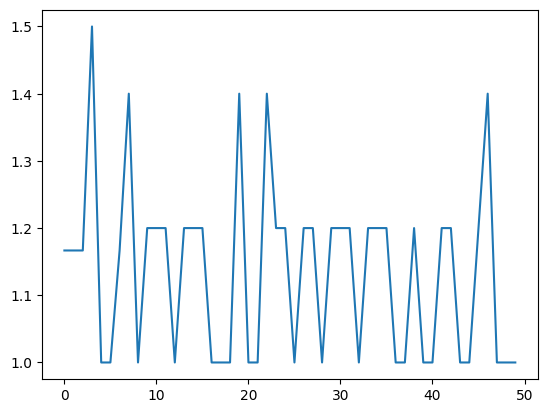

In [96]:
plt.plot(bad_guy_split)